In [2]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import collections
%matplotlib inline

Using TensorFlow backend.
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jocelyn/opt/anaconda3/lib/pytho

In [3]:
path = glob.glob('../TrafficNet/VolvoData/2019/*.csv')

X_all = np.empty((1, 88))
Y_all = np.empty((1,))

for i in range(len(path)):
    print(i)
    
    Flow = pd.read_csv(path[i], usecols=['Lat','Long','Acceleration','Decelerating','Indicator','InReverse','Lane','PositionInLane','Velocity','YawRate','PosLgt1','PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLgt6','PosLgt7','PosLat1','PosLat2','PosLat3','PosLat4','PosLat5','PosLat6','PosLat7','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLgt6','VelLgt7','VelLat1','VelLat2','VelLat3','VelLat4','VelLat5','VelLat6','VelLat7','AccLgt1','AccLgt2','AccLgt3','AccLgt4','AccLgt5','AccLgt6','AccLgt7','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5','AccLat6','AccLat7','Angle1','Angle2','Angle3','Angle4','Angle5','Angle6','Angle7','Type1','Type2','Type3','Type4','Type5','Type6','Type7','Id1','Id2','Id3','Id4','Id5','Id6','Id7','Lane1','Lane2','Lane3','Lane4','Lane5','Lane6','Lane7','PositionInLane1','PositionInLane2','PositionInLane3','PositionInLane4','PositionInLane5','PositionInLane6','PositionInLane7','Lead','Flow'])
    Flow.fillna(-1, inplace=True)
    
    Y_train = np.array(Flow['Flow'].values)
    X_train = np.array(Flow[['Lat','Long','Acceleration','Decelerating','Indicator','InReverse','Lane','PositionInLane','Velocity','YawRate','PosLgt1','PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLgt6','PosLgt7','PosLat1','PosLat2','PosLat3','PosLat4','PosLat5','PosLat6','PosLat7','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLgt6','VelLgt7','VelLat1','VelLat2','VelLat3','VelLat4','VelLat5','VelLat6','VelLat7','AccLgt1','AccLgt2','AccLgt3','AccLgt4','AccLgt5','AccLgt6','AccLgt7','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5','AccLat6','AccLat7','Angle1','Angle2','Angle3','Angle4','Angle5','Angle6','Angle7','Type1','Type2','Type3','Type4','Type5','Type6','Type7','Id1','Id2','Id3','Id4','Id5','Id6','Id7','Lane1','Lane2','Lane3','Lane4','Lane5','Lane6','Lane7','PositionInLane1','PositionInLane2','PositionInLane3','PositionInLane4','PositionInLane5','PositionInLane6','PositionInLane7','Lead']])
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train.shape[1]

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #print(len(X_train))
    print(X_train.shape, Y_train.shape)
    
    X_all = np.append(X_all, X_train, axis=0)
    Y_all = np.append(Y_all, Y_train, axis=0)

0
(97434, 88) (97434,)
1
(46362, 88) (46362,)
2
(56119, 88) (56119,)
3
(107451, 88) (107451,)
4
(54506, 88) (54506,)
5
(56795, 88) (56795,)
6
(54873, 88) (54873,)
7
(139583, 88) (139583,)
8
(95999, 88) (95999,)
9
(93916, 88) (93916,)
10
(67954, 88) (67954,)
11
(70547, 88) (70547,)
12
(32138, 88) (32138,)


In [4]:
len(X_all)

973678

In [5]:
X_all = X_all[1:973678]
Y_all = Y_all[1:973678]

# Feature selection

## ANOVA f-test Feature Selection

In [6]:
# example of anova f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

In [7]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 138.375323
Feature 1: 248.915221
Feature 2: 2.523476
Feature 3: 1430.408634
Feature 4: 75.034517
Feature 5: 20.479959
Feature 6: 1287.331247
Feature 7: 32.705931
Feature 8: 10023.461992
Feature 9: 48.208694
Feature 10: 83597.029123
Feature 11: 28623.934249
Feature 12: 8685.817860
Feature 13: 2021.341157
Feature 14: 429.348062
Feature 15: 77.712959
Feature 16: 6.797093
Feature 17: 3057.791867
Feature 18: 2692.115698
Feature 19: 1204.368069
Feature 20: 328.074831
Feature 21: 80.470287
Feature 22: 14.660922
Feature 23: 1.049266
Feature 24: 169384.573826
Feature 25: 39415.347118
Feature 26: 10592.043956
Feature 27: 2367.383912
Feature 28: 496.292244
Feature 29: 84.732781
Feature 30: 6.827262
Feature 31: 80511.579588
Feature 32: 28479.725534
Feature 33: 8334.050706
Feature 34: 1898.791908
Feature 35: 384.125148
Feature 36: 54.940360
Feature 37: 6.533253
Feature 38: 229101.886904
Feature 39: 44371.217781
Feature 40: 11265.297593
Feature 41: 2468.472702
Feature 42: 524.139815
Featu

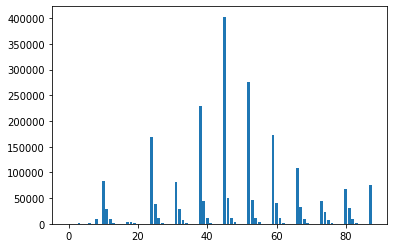

In [8]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.5, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# Modeling With Selected Features

## Model Built Using All Features

In [9]:
# evaluation of a model using all input features
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 99.51


## Model Built Using ANOVA f-test Features

In [10]:
# evaluation of a model using 4 features chosen with anova f-test
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# feature selection
def select_features_self(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_classif, k=30)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features_self(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat_anova = model.predict(X_test_fs)
# evaluate predictions
accuracy_anova = accuracy_score(y_test, yhat_anova)
print('Accuracy: %.2f' % (accuracy_anova*100))

Accuracy: 99.42


## Tune the Number of Selected Features

In [2]:
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [23]:
path = glob.glob('../TrafficNet/VolvoData/2019/*.csv')

X_all = np.empty((1, 88))
Y_all = np.empty((1,))

for i in range(5):
    print(i)
    
    Flow = pd.read_csv(path[i], usecols=['Lat','Long','Acceleration','Decelerating','Indicator','InReverse','Lane','PositionInLane','Velocity','YawRate','PosLgt1','PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLgt6','PosLgt7','PosLat1','PosLat2','PosLat3','PosLat4','PosLat5','PosLat6','PosLat7','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLgt6','VelLgt7','VelLat1','VelLat2','VelLat3','VelLat4','VelLat5','VelLat6','VelLat7','AccLgt1','AccLgt2','AccLgt3','AccLgt4','AccLgt5','AccLgt6','AccLgt7','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5','AccLat6','AccLat7','Angle1','Angle2','Angle3','Angle4','Angle5','Angle6','Angle7','Type1','Type2','Type3','Type4','Type5','Type6','Type7','Id1','Id2','Id3','Id4','Id5','Id6','Id7','Lane1','Lane2','Lane3','Lane4','Lane5','Lane6','Lane7','PositionInLane1','PositionInLane2','PositionInLane3','PositionInLane4','PositionInLane5','PositionInLane6','PositionInLane7','Lead','Flow'])
    Flow.fillna(-1, inplace=True)
    
    Y_train = np.array(Flow['Flow'].values)
    X_train = np.array(Flow[['Lat','Long','Acceleration','Decelerating','Indicator','InReverse','Lane','PositionInLane','Velocity','YawRate','PosLgt1','PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLgt6','PosLgt7','PosLat1','PosLat2','PosLat3','PosLat4','PosLat5','PosLat6','PosLat7','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLgt6','VelLgt7','VelLat1','VelLat2','VelLat3','VelLat4','VelLat5','VelLat6','VelLat7','AccLgt1','AccLgt2','AccLgt3','AccLgt4','AccLgt5','AccLgt6','AccLgt7','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5','AccLat6','AccLat7','Angle1','Angle2','Angle3','Angle4','Angle5','Angle6','Angle7','Type1','Type2','Type3','Type4','Type5','Type6','Type7','Id1','Id2','Id3','Id4','Id5','Id6','Id7','Lane1','Lane2','Lane3','Lane4','Lane5','Lane6','Lane7','PositionInLane1','PositionInLane2','PositionInLane3','PositionInLane4','PositionInLane5','PositionInLane6','PositionInLane7','Lead']])
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train.shape[1]

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #print(len(X_train))
    print(X_train.shape, Y_train.shape)
    
    X_all = np.append(X_all, X_train, axis=0)
    Y_all = np.append(Y_all, Y_train, axis=0)

0
(97434, 88) (97434,)
1
(46362, 88) (46362,)
2
(56119, 88) (56119,)
3
(107451, 88) (107451,)
4
(54506, 88) (54506,)


In [24]:
len(X_all)

361873

In [25]:
X_all = X_all[1:361873]
Y_all = Y_all[1:361873]

In [7]:
# compare different numbers of features selected using anova f-test


# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X_all.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X_all, Y_all)
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5 16 23 30 37 44 58 65 72 79 86] are constant.
  UserWarning)
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Best Mean Accuracy: 1.000
Best Config: {'anova__k': 63}


>1 0.994 (0.000)
>2 0.994 (0.000)
>3 0.994 (0.000)
>4 0.994 (0.000)
>5 0.994 (0.000)
>6 0.994 (0.000)
>7 0.994 (0.000)
>8 0.994 (0.000)
>9 0.994 (0.000)
>10 0.994 (0.000)
>11 0.994 (0.000)
>12 0.994 (0.000)
>13 0.994 (0.000)
>14 0.994 (0.000)
>15 0.994 (0.000)
>16 0.994 (0.000)
>17 0.994 (0.000)
>18 0.994 (0.000)
>19 0.994 (0.000)
>20 0.994 (0.000)
>21 0.994 (0.000)
>22 0.994 (0.000)
>23 0.994 (0.000)
>24 0.994 (0.000)
>25 0.994 (0.000)
>26 0.994 (0.000)
>27 0.994 (0.000)
>28 0.994 (0.000)
>29 0.994 (0.000)
>30 0.994 (0.000)
>31 0.994 (0.000)
>32 0.994 (0.000)
>33 0.994 (0.000)
>34 1.000 (0.000)
>35 1.000 (0.000)
>36 1.000 (0.000)
>37 1.000 (0.000)
>38 1.000 (0.000)
>39 1.000 (0.000)
>40 1.000 (0.000)
>41 1.000 (0.000)
>42 1.000 (0.000)
>43 1.000 (0.000)
>44 1.000 (0.000)
>45 1.000 (0.000)
>46 1.000 (0.000)
>47 1.000 (0.000)
>48 1.000 (0.000)
>49 1.000 (0.000)
>50 1.000 (0.000)
>51 1.000 (0.000)
>52 1.000 (0.000)
>53 1.000 (0.000)
>54 1.000 (0.000)
>55 1.000 (0.000)
>56 1.000 (0.000)
>

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>72 1.000 (0.000)
>73 1.000 (0.000)
>74 1.000 (0.000)
>75 1.000 (0.000)
>76 1.000 (0.000)
>77 1.000 (0.000)
>78 1.000 (0.000)
>79 1.000 (0.000)
>80 1.000 (0.000)
>81 1.000 (0.000)
>82 1.000 (0.000)
>83 1.000 (0.000)
>84 1.000 (0.000)
>85 1.000 (0.000)
>86 1.000 (0.000)
>87 1.000 (0.000)
>88 1.000 (0.000)


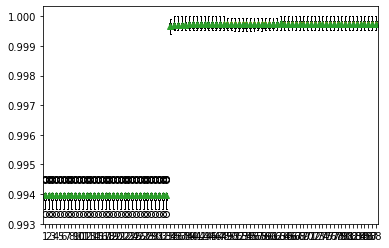

In [8]:
# compare different numbers of features selected using anova f-test


# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_all, Y_all, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define number of features to evaluate
num_features = [i+1 for i in range(X_all.shape[1])]
# enumerate each number of features
results = list()
for k in num_features:
	# create pipeline
	model = LogisticRegression(solver='liblinear')
	fs = SelectKBest(score_func=f_classif, k=k)
	pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
	# evaluate the model
	scores = evaluate_model(pipeline)
	results.append(scores)
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

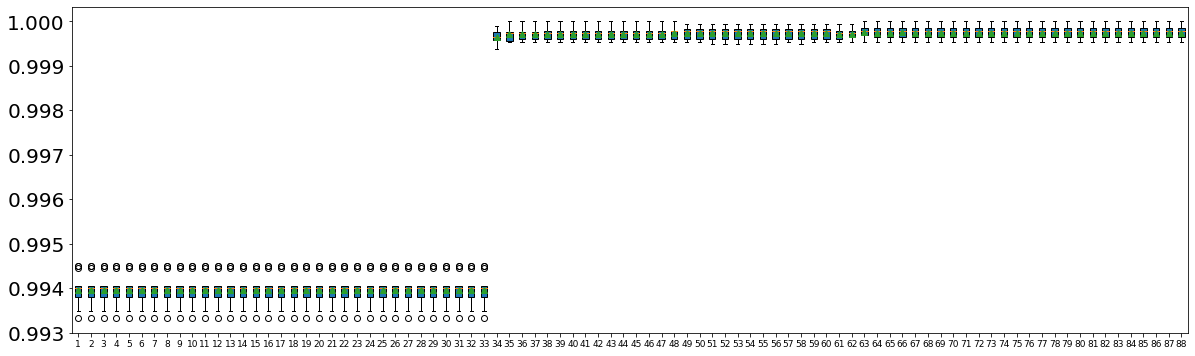

In [9]:
pyplot.figure(figsize=(20,6))
pyplot.boxplot(results, labels=num_features, showmeans=True, patch_artist=True)
pyplot.xticks(fontsize=9)
pyplot.yticks(fontsize=20)
pyplot.show()

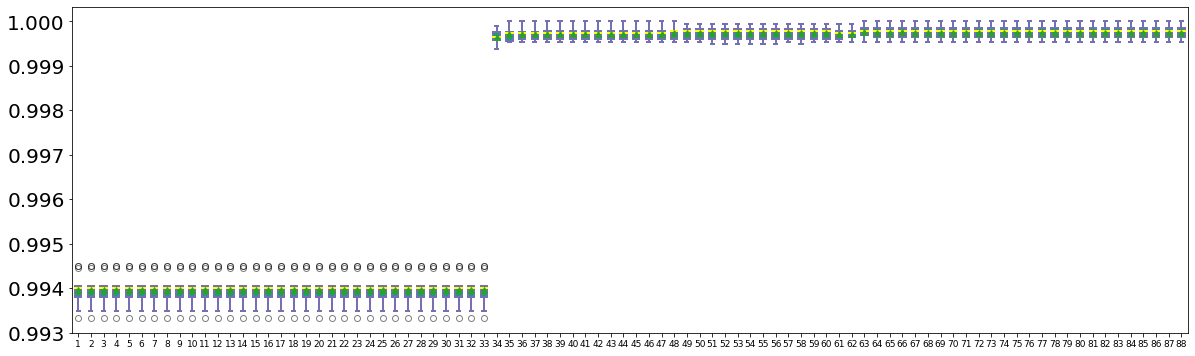

In [10]:
pyplot.figure(figsize=(20,6))
pyplot.xticks(fontsize=9)
pyplot.yticks(fontsize=20)

bp = pyplot.boxplot(results, labels=num_features, showmeans=True, patch_artist=True)
#ax = fig.add_subplot(111)
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e70' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='yellow', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

## the final 35 features

In [18]:
# feature selection
def select_features(X_train, y_train, X_test, n):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k=n)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 189.394894
Feature 1: 232.092220
Feature 2: 15.158710
Feature 3: 832.816852
Feature 4: 8.776901
Feature 5: 7.071197
Feature 6: 1017.372947
Feature 7: 55.838480
Feature 8: 4339.653764
Feature 9: 17.020462
Feature 10: 40038.488309
Feature 11: 13008.917783
Feature 12: 3568.581481
Feature 13: 758.644237
Feature 14: 110.135945
Feature 15: 9.963195
Feature 16: 0.135713
Feature 17: 3783.077499
Feature 18: 2117.632837
Feature 19: 606.096169
Feature 20: 169.150412
Feature 21: 53.732455
Feature 22: 4.731720
Feature 23: 0.129020
Feature 24: 94637.535481
Feature 25: 18157.971833
Feature 26: 4325.344256
Feature 27: 880.383669
Feature 28: 127.985087
Feature 29: 11.068107
Feature 30: 0.114619
Feature 31: 41014.286376
Feature 32: 12993.296383
Feature 33: 3522.301230
Feature 34: 749.256636
Feature 35: 107.991068
Feature 36: 6.790629
Feature 37: 0.107133
Feature 38: 129320.672305
Feature 39: 19639.048899
Feature 40: 4608.832992
Feature 41: 948.400733
Feature 42: 139.335927
Feature 43: 12.6626

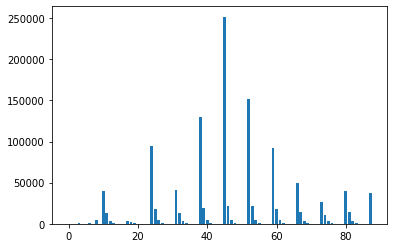

In [26]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.5, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, 35)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [27]:
fs.get_support(indices=True)

array([ 6,  8, 10, 11, 12, 17, 18, 24, 25, 26, 31, 32, 33, 38, 39, 40, 45,
       46, 47, 52, 53, 54, 59, 60, 61, 66, 67, 68, 73, 74, 75, 80, 81, 82,
       87])

[10, 11, 12, 17, 18, 24, 25, 26, 31, 32, 33, 38, 39, 40, 45, 46, 47,
       52, 53, 54, 59, 60, 61, 66, 67, 68, 73, 74, 75, 80, 81, 82, 87]
[ 6,  8, 10, 11, 12, 17, 18, 24, 25, 26, 31, 32, 33, 38, 39, 40, 45,
       46, 47, 52, 53, 54, 59, 60, 61, 66, 67, 68, 73, 74, 75, 80, 81, 82,
       87]

多了6和8，即7和9 in excel

In [15]:
my_list33 = [10, 11, 12, 17, 18, 24, 25, 26, 31, 32, 33, 38, 39, 40, 45, 46, 47,
       52, 53, 54, 59, 60, 61, 66, 67, 68, 73, 74, 75, 80, 81, 82, 87]
new_list = [x+1 for x in my_list33]
new_list

[11,
 12,
 13,
 18,
 19,
 25,
 26,
 27,
 32,
 33,
 34,
 39,
 40,
 41,
 46,
 47,
 48,
 53,
 54,
 55,
 60,
 61,
 62,
 67,
 68,
 69,
 74,
 75,
 76,
 81,
 82,
 83,
 88]

# Train model

In [6]:
# Set up a 'look back' dataset for sequence to label prediction with Keras.

# The LSTM network expects the input data (X) to be provided with a specific
# array structure in the form of: [samples, time steps, features].

# create_dataset is adapted from
# http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

def create_dataset(X, Y, **options):
    """Convert an array of X, Y values into a dataset matrix for and LSTM"""
    
    look_back = options.pop('look_back', None)
    dataX, dataY = [], []
    for i in range(len(X) - look_back):
        a = X[i:(i+look_back)]
        dataX.append(a)
        dataY.append(Y[i + look_back - 1])
    return np.array(dataX), np.array(dataY)

# Predictions will be based on look_back minutes of data:
look_back = 50

[11,12,13,18,19,25,26,27,32,33, 34, 39, 40, 41, 46, 47, 48, 53, 54, 55, 60, 61, 62,67, 68, 69,74, 75, 76, 81, 82, 83, 88]
'PosLgt1','PosLgt2','PosLgt3','PosLat1','PosLat2','VelLgt1','VelLgt2','VelLgt3','VelLat1','VelLat2','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Type3','Id1','Id2','Id3','Lane1','Lane2','Lane3','PositionInLane1','PositionInLane2','PositionInLane3','Lead'

In [44]:
path = glob.glob('../TrafficNet/VolvoData/2019/*.csv')

X_all = np.empty((1, 50, 35))
Y_all = np.empty((1,))

for i in range(len(path)):
    print(i)
    
    Flow = pd.read_csv(path[i], usecols=['Lane','Velocity','PosLgt1','PosLgt2','PosLgt3','PosLat1','PosLat2','VelLgt1','VelLgt2','VelLgt3','VelLat1','VelLat2','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Type3','Id1','Id2','Id3','Lane1','Lane2','Lane3','PositionInLane1','PositionInLane2','PositionInLane3','Lead','Flow'])
    Flow.fillna(-1, inplace=True)
    
    Y_train = np.array(Flow['Flow'].values)
    X_train = np.array(Flow[['Lane','Velocity','PosLgt1','PosLgt2','PosLgt3','PosLat1','PosLat2','VelLgt1','VelLgt2','VelLgt3','VelLat1','VelLat2','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Type3','Id1','Id2','Id3','Lane1','Lane2','Lane3','PositionInLane1','PositionInLane2','PositionInLane3','Lead']])
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train.shape[1]

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #print(len(X_train))
    print(X_train.shape, Y_train.shape)
    
    X, Y = create_dataset(X_train, Y_train, look_back=look_back)
    print(X.shape, Y.shape)
    
    X_all = np.append(X_all, X, axis=0)
    Y_all = np.append(Y_all, Y, axis=0)

0
(97434, 35) (97434,)
(97384, 50, 35) (97384,)
1
(46362, 35) (46362,)
(46312, 50, 35) (46312,)
2
(56119, 35) (56119,)
(56069, 50, 35) (56069,)
3
(107451, 35) (107451,)
(107401, 50, 35) (107401,)
4
(54506, 35) (54506,)
(54456, 50, 35) (54456,)
5
(56795, 35) (56795,)
(56745, 50, 35) (56745,)
6
(54873, 35) (54873,)
(54823, 50, 35) (54823,)
7
(95999, 35) (95999,)
(95949, 50, 35) (95949,)
8
(93916, 35) (93916,)
(93866, 50, 35) (93866,)
9
(67954, 35) (67954,)
(67904, 50, 35) (67904,)
10
(70547, 35) (70547,)
(70497, 50, 35) (70497,)
11
(32138, 35) (32138,)
(32088, 50, 35) (32088,)


In [4]:
(len(X_all)//64)*64 + 1

833473

In [45]:
X_all = X_all[1:833473]
Y_all = Y_all[1:833473]

collections.Counter(Y_all)

Counter({0.0: 749976, 1.0: 83496})

In [6]:
457473/(457473+420671)
749976/83496

8.982178787007761

In [46]:
# Create the LSTM network.
batch_size = 32
dropout = 0.5
num_epoch = 100
earlyStopping = EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')
weights = {0:1, 1:9}

In [47]:
model_Flow1 = Sequential()
model_Flow1.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_Flow1.add(Dropout(dropout))
model_Flow1.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_Flow1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 3..., units=10)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [10]:
model_Flow1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (32, 10)                  1840      
_________________________________________________________________
dropout_2 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_2 (Dense)              (32, 1)                   11        
Total params: 1,851
Trainable params: 1,851
Non-trainable params: 0
_________________________________________________________________


In [48]:
history1 = model_Flow1.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 416736 samples, validate on 416736 samples
Epoch 1/100
416736/416736 [==============================] - 2719s 7ms/step - loss: 0.0344 - accuracy: 0.9920 - val_loss: 0.0397 - val_accuracy: 0.9844
Epoch 2/100
416736/416736 [==============================] - 2990s 7ms/step - loss: 0.0109 - accuracy: 0.9964 - val_loss: 0.0629 - val_accuracy: 0.9832


In [49]:
history1.history

{'val_loss': [0.03974730271026825, 0.06288969359351729],
 'val_accuracy': [0.984404981136322, 0.9832243919372559],
 'loss': [0.034387690377756075, 0.010917265902437117],
 'accuracy': [0.99195653, 0.9963574]}

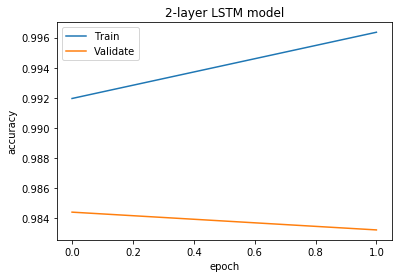

In [50]:
# Plot history for training and validation loss.

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('2-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

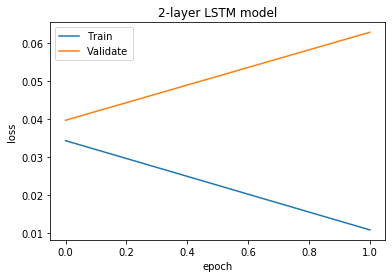

In [51]:
# Plot history for training and validation loss.

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('2-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [15]:
model_Flow2 = Sequential()
model_Flow2.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_Flow2.add(Dropout(dropout))
model_Flow2.add(Dense(30, activation='relu'))
model_Flow2.add(Dropout(dropout))
model_Flow2.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_Flow2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 3..., units=10)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [10]:
model_Flow2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (32, 10)                  1320      
_________________________________________________________________
dropout_1 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_1 (Dense)              (32, 30)                  330       
_________________________________________________________________
dropout_2 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_2 (Dense)              (32, 1)                   31        
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________


In [16]:
history2 = model_Flow2.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 416736 samples, validate on 416736 samples
Epoch 1/100
416736/416736 [==============================] - 2946s 7ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0638 - val_accuracy: 0.9811
Epoch 2/100
416736/416736 [==============================] - 3005s 7ms/step - loss: 0.0114 - accuracy: 0.9967 - val_loss: 0.1283 - val_accuracy: 0.9787


In [17]:
history2.history

{'val_loss': [0.06378744742221354, 0.12831311211609747],
 'val_accuracy': [0.9810911417007446, 0.9786507487297058],
 'loss': [0.03447545026151066, 0.011396870350109497],
 'accuracy': [0.9892714, 0.99669814]}

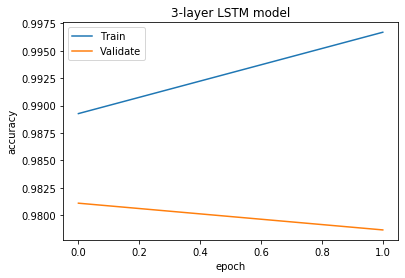

In [18]:
# Plot history for training and validation loss.

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('3-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

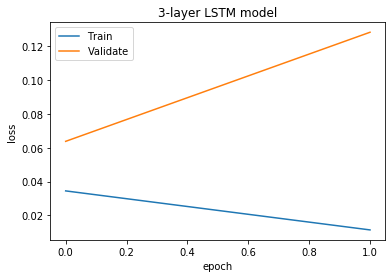

In [19]:
# Plot history for training and validation loss.

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('3-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [20]:
model_Flow3 = Sequential()
model_Flow3.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_Flow3.add(Dropout(dropout))
model_Flow3.add(Dense(30, activation='relu'))
model_Flow3.add(Dropout(dropout))
model_Flow3.add(Dense(30, activation='relu'))
model_Flow3.add(Dropout(dropout))
model_Flow3.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_Flow3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 3..., units=10)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [16]:
model_Flow3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (32, 10)                  1320      
_________________________________________________________________
dropout_3 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_3 (Dense)              (32, 30)                  330       
_________________________________________________________________
dropout_4 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_4 (Dense)              (32, 30)                  930       
_________________________________________________________________
dropout_5 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_5 (Dense)              (32, 1)                  

In [21]:
history3 = model_Flow3.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 416736 samples, validate on 416736 samples
Epoch 1/100
416736/416736 [==============================] - 3135s 8ms/step - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.0983 - val_accuracy: 0.9785
Epoch 2/100
416736/416736 [==============================] - 3302s 8ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.1370 - val_accuracy: 0.9783


In [22]:
history3.history

{'val_loss': [0.09825760731187172, 0.13701021012471296],
 'val_accuracy': [0.978477954864502, 0.9782524108886719],
 'loss': [0.038816187797419646, 0.014455556292935675],
 'accuracy': [0.98767805, 0.9952224]}

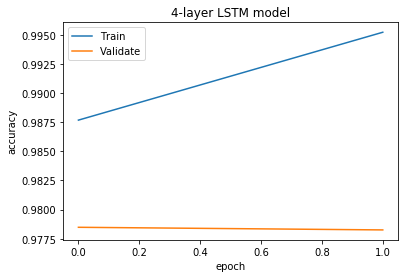

In [23]:
# Plot history for training and validation loss.

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('4-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

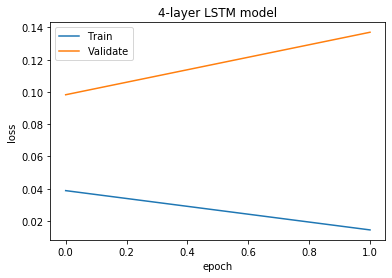

In [24]:
# Plot history for training and validation loss.

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('4-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [8]:
model_Flow4 = Sequential()
model_Flow4.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_Flow4.add(Dropout(dropout))
model_Flow4.add(Dense(30, activation='relu'))
model_Flow4.add(Dropout(dropout))
model_Flow4.add(Dense(30, activation='relu'))
model_Flow4.add(Dropout(dropout))
model_Flow4.add(Dense(10, activation='relu'))
model_Flow4.add(Dropout(dropout))
model_Flow4.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_Flow4.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 3..., units=10)`
  


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [12]:
model_Flow4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (32, 10)                  1760      
_________________________________________________________________
dropout_4 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_4 (Dense)              (32, 30)                  330       
_________________________________________________________________
dropout_5 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_5 (Dense)              (32, 30)                  930       
_________________________________________________________________
dropout_6 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_6 (Dense)              (32, 10)                 

In [9]:
history4 = model_Flow4.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 416736 samples, validate on 416736 samples
Epoch 1/100
416736/416736 [==============================] - 2628s 6ms/step - loss: 0.0493 - accuracy: 0.9834 - val_loss: 0.0604 - val_accuracy: 0.9817
Epoch 2/100
416736/416736 [==============================] - 2667s 6ms/step - loss: 0.0235 - accuracy: 0.9925 - val_loss: 0.1007 - val_accuracy: 0.9834


In [10]:
history4.history

{'val_loss': [0.06042624625828179, 0.10065398371843685],
 'val_accuracy': [0.9817222356796265, 0.9834355711936951],
 'loss': [0.04931181271653603, 0.023486194846254825],
 'accuracy': [0.98340195, 0.99245083]}

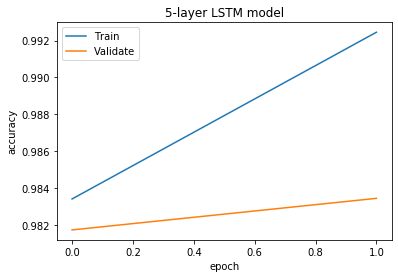

In [11]:
# Plot history for training and validation loss.

plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('5-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

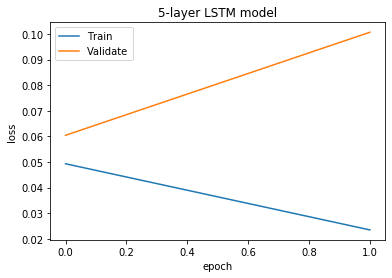

In [12]:
# Plot history for training and validation loss.

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('5-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [13]:
model_Flow5 = Sequential()
model_Flow5.add(LSTM(output_dim=20, batch_input_shape=[batch_size, look_back, dimof_input]))
model_Flow5.add(Dropout(dropout))
model_Flow5.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_Flow5.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 3..., units=20)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [14]:
model_Flow5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (32, 20)                  4480      
_________________________________________________________________
dropout_5 (Dropout)          (32, 20)                  0         
_________________________________________________________________
dense_5 (Dense)              (32, 1)                   21        
Total params: 4,501
Trainable params: 4,501
Non-trainable params: 0
_________________________________________________________________


In [15]:
history5 = model_Flow5.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 416736 samples, validate on 416736 samples
Epoch 1/100
416736/416736 [==============================] - 2912s 7ms/step - loss: 0.0221 - accuracy: 0.9941 - val_loss: 0.1390 - val_accuracy: 0.9786
Epoch 2/100
416736/416736 [==============================] - 2986s 7ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.1491 - val_accuracy: 0.9748


In [16]:
history5.history

{'val_loss': [0.13896331402930007, 0.1491097892125231],
 'val_accuracy': [0.9785619378089905, 0.9747897982597351],
 'loss': [0.022094737174714992, 0.005724612158338365],
 'accuracy': [0.9941138, 0.9981763]}

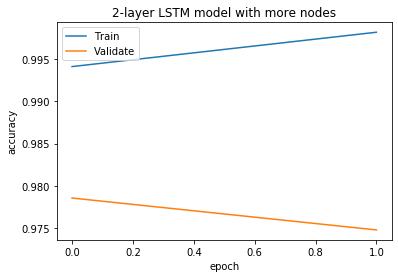

In [17]:
# Plot history for training and validation loss.

plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('2-layer LSTM model with more nodes')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

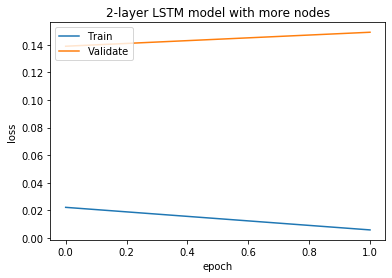

In [18]:
# Plot history for training and validation loss.

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('2-layer LSTM model with more nodes')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

## serialize model to JSON
https://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [52]:
model_json1 = model_Flow1.to_json()
with open("FlowVolvo1.json", "w") as json_file:
    json_file.write(model_json1)
    
# serialize weights to HDF5
model_Flow1.save_weights("FlowVolvo1_weights.h5")

model_Flow1.save("FlowVolvo1.h5")

In [20]:
model_json4 = model_Flow4.to_json()

with open("FlowVolvo4.json", "w") as json_file:
    json_file.write(model_json4)
    
# serialize weights to HDF5
model_Flow4.save_weights("FlowVolvo4_weights.h5")

print("Saved model to disk")

Saved model to disk


## Save Model Weights and Architecture Together

In [21]:
#model_Flow1.save("TrafficNetToVolvo_FlowMaskingSparse-1.h5")
model_Flow4.save("FlowVolvo4.h5")

print("Saved model to disk")

Saved model to disk


## Predict for volvo data, code from previous 6.1

In [3]:
volvo = pd.read_csv('../TrafficNet/VolvoData/2019w26_CPUload_Kiel_Amsterdam-0011.csv', usecols=['Lane','Velocity','PosLgt1','PosLgt2','PosLgt3','PosLat1','PosLat2','VelLgt1','VelLgt2','VelLgt3','VelLat1','VelLat2','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Type3','Id1','Id2','Id3','Lane1','Lane2','Lane3','PositionInLane1','PositionInLane2','PositionInLane3','Lead','Flow'])
volvo.head()

,Lane,Velocity,PosLgt1,PosLgt2,PosLgt3,PosLat1,PosLat2,VelLgt1,VelLgt2,VelLgt3,...,Id2,Id3,Lane1,Lane2,Lane3,PositionInLane1,PositionInLane2,PositionInLane3,Lead,Flow
0,1.0,0.74290,9.8657,NaN,NaN,0.50626,NaN,0.057183,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,0.63268,NaN,NaN,1.0,0
1,1.0,0.72335,9.8335,NaN,NaN,0.50702,NaN,0.044215,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,0.63840,NaN,NaN,1.0,0
2,1.0,0.70771,9.7691,NaN,NaN,0.51163,NaN,0.043706,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,0.63171,NaN,NaN,1.0,0
3,1.0,0.68816,9.7315,NaN,NaN,0.51237,NaN,0.043706,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,0.63326,NaN,NaN,1.0,0
4,1.0,0.67252,9.6849,NaN,NaN,0.51738,NaN,0.018643,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,0.63818,NaN,NaN,1.0,0


In [7]:
volvo.fillna(-1, inplace=True)

Yvolvo = np.array(volvo['Flow'].values)
Xvolvo = np.array(volvo[['Lane','Velocity','PosLgt1','PosLgt2','PosLgt3','PosLat1','PosLat2','VelLgt1','VelLgt2','VelLgt3','VelLat1','VelLat2','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Type3','Id1','Id2','Id3','Lane1','Lane2','Lane3','PositionInLane1','PositionInLane2','PositionInLane3','Lead']])

    
# Scale/whiten the X data
scaler = StandardScaler()
X_volvo = scaler.fit_transform(Xvolvo)
XP_volvo, YP_volvo = create_dataset(X_volvo, Yvolvo, look_back=look_back)

(len(XP_volvo)//64)*64

139520

In [8]:
XPP_volvo = XP_volvo[:139520]
YPP_volvo = YP_volvo[:139520]

In [9]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model = load_model('FlowVolvo4.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [38]:
from datetime import datetime
start=datetime.now()
Y_predict_volvo = model.predict_classes(XPP_volvo, verbose=True)
print(datetime.now()-start)

#equal_arrays_volvo = (Y_predict_volvo == YPP_volvo).all(axis=1)
#acc_volvo = np.count_nonzero(equal_arrays_volvo == True)/len(equal_arrays_volvo)
a = Y_predict_volvo.tolist()
a2 = [item[0] for item in a]
b = YPP_volvo.tolist()
equal_arrays_volvo = [i for i, (x, y) in enumerate(zip(a2, b)) if x == y]
acc_volvo = len(equal_arrays_volvo)/len(a2)
print(acc_volvo)

139520/139520 [==============================] - 78s 559us/step
0:01:18.059588
0.9998638188073394


In [43]:
f = open("predict_FlowVolvo4.csv", "w")

for index in range(len(a2)):
    f.write(str(a2[index]) + "," + str(b[index]) + "\n")
f.close()

## Predict for TrafficNet data, Give up as more features cannot be found in TrafficNet

In [ ]:
TrafficNet = pd.read_csv('../TrafficNet/VolvoData/Flow0.csv', usecols=['c10','GpsSpeedWsu','PosLgt1','PosLgt2','PosLgt3','PosLat1','PosLat2','VelLgt1','VelLgt2','VelLgt3','VelLat1','VelLat2','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Type3','Id1','Id2','Id3','Lane1','Lane2','Lane3','PositionInLane1','PositionInLane2','PositionInLane3','Lead','Flow'])
TrafficNet.head()

In [ ]:
TrafficNet.fillna(-1, inplace=True)

YNet = np.array(TrafficNet['Flow'].values)
XNet = np.array(TrafficNet[['Lane','Velocity','PosLgt1','PosLgt2','PosLgt3','PosLat1','PosLat2','VelLgt1','VelLgt2','VelLgt3','VelLat1','VelLat2','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Type3','Id1','Id2','Id3','Lane1','Lane2','Lane3','PositionInLane1','PositionInLane2','PositionInLane3','Lead']])

    
# Scale/whiten the X data
X_Net = scaler.fit_transform(XNet)
XP_Net, YP_Net = create_dataset(X_Net, YNet, look_back=look_back)

(len(XP_Net)//64)*64 + 1

In [ ]:
XPP_Net = XP_Net[:97408]
YPP_Net = YP_Net[:97408]

In [ ]:
from datetime import datetime
start=datetime.now()
Y_predict_Net = model_CutIn.predict_classes(XPP_Net, verbose=True)
print(datetime.now()-start)

equal_arrays_Net = (Y_predict_Net == YPP_Net).all(axis=1)
acc_Net = np.count_nonzero(equal_arrays_Net == True)/len(equal_arrays_Net)
print(acc_Net)

## model_Flow4 predict

In [53]:
start1=datetime.now()
Y_predict_volvo1 = model_Flow1.predict_classes(XPP_volvo, verbose=True)
print(datetime.now()-start1)

#equal_arrays_volvo = (Y_predict_volvo == YPP_volvo).all(axis=1)
#acc_volvo = np.count_nonzero(equal_arrays_volvo == True)/len(equal_arrays_volvo)
a1 = Y_predict_volvo1.tolist()
a21 = [item[0] for item in a1]
#b = YPP_volvo.tolist()
equal_arrays_volvo1 = [i for i, (x, y) in enumerate(zip(a21, b)) if x == y]
acc_volvo1 = len(equal_arrays_volvo1)/len(a21)
print(acc_volvo1)

139520/139520 [==============================] - 118s 844us/step
0:01:58.141999
0.9996129587155963


In [54]:
ff = open("predict_FlowVolvo1.csv", "w")

for index in range(len(a21)):
    ff.write(str(a21[index]) + "," + str(b[index]) + "\n")
ff.close()

In [ ]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model = load_model('model.h5')
# summarize model.
model.summary()
# load dataset
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

In [ ]:
# Write predictions to disk

data1988.to_csv("TrafficNetToVolvo-6.1-CutIn-Masking_PredictionResult.csv", encoding='utf_8_sig', index=False)